In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os

In [2]:
path = '../data/A2CiLSTMRNDPN/'
fn_ac = '_0514_01-22-57'
fn_rnd = '_0526_01-37-31'
name = 'data.csv'

fac = os.path.join(path, fn_ac, name)
frnd = os.path.join(path, fn_rnd, name)

dfac = pd.read_csv(fac)
dfrnd = pd.read_csv(frnd)

In [2]:
er_ac = dfac['extrinsic_rewards'].values
ir_ac = dfac['intrinsic_rewards'].values
r_ac = er_ac + ir_ac

er_rnd = dfrnd['extrinsic_rewards'].values
ir_rnd = dfrnd['intrinsic_rewards'].values
r_rnd = er_rnd + ir_rnd


NameError: name 'dfac' is not defined

In [60]:
ir_rnd

array([ 23.99490356,  10.05206203,   2.91951132,  17.88660622,
        35.45939636,  12.89343357,  17.06950188,  40.99833298,
        70.34289551,  11.64533901,   1.34376812,  32.23994827,
         4.25219393,  17.63178444,  62.29282379,   6.82399273,
        14.8028717 ,  12.84532738,  20.22608757,   1.94786119,
        21.51505852,   1.66291296,   3.0037322 ,  50.33656693,
         8.94504166,  14.81703186,   1.37571311,  15.54730606,
         3.71270084,  36.27404785,  37.42248917,   3.9453826 ,
        11.88848972,  19.57524872,   3.40674829, 187.16882324,
       120.90484619,   4.83488178,  94.12524414,  95.18495178,
        59.96964264, 102.3241272 , 151.72323608,  15.02622986,
        25.36787796, 204.37443542,  30.49552155,  15.9088068 ,
        63.99755096,  21.29919815, 180.42034912, 164.26730347,
        84.64633179,  19.80302238,  33.36972427, 112.33401489,
       131.45608521,  13.6571455 ,  48.65018845, 264.77923584,
        38.49438095, 170.45274353,   9.59165192, 184.73

In [1]:
def movstd(T, m):
    n = T.shape[0]
    
    cumsum = np.cumsum(T)
    cumsum_square = np.cumsum(T**2)
    
    cumsum = np.insert(cumsum, 0, 0)               # Insert a 0 at the beginning of the array
    cumsum_square = np.insert(cumsum_square, 0, 0) # Insert a 0 at the beginning of the array
    
    seg_sum = cumsum[m:] - cumsum[:-m]
    seg_sum_square = cumsum_square[m:] - cumsum_square[:-m]
    
    return np.sqrt( seg_sum_square/m - (seg_sum/m)**2 )

def movmean(T, m):
    assert(m <= T.shape[0])
    n = T.shape[0]
    
    sums = np.zeros(n - m + 1)
    sums[0] = np.sum(T[0:m])
    
    cumsum = np.cumsum(T)
    cumsum = np.insert(cumsum, 0, 0) # Insert a 0 at the beginning of the array
    
    sums = cumsum[m:] - cumsum[:-m]
    return sums/m

movstd(r_rnd, 20).size

NameError: name 'r_rnd' is not defined

In [52]:
print(movmean(r_rnd, 50))
print(moving_average(r_rnd, 50))

[-1.7954e+02 -1.8699e+02 -1.9404e+02 -2.0146e+02 -2.0485e+02 -2.1272e+02
 -2.1754e+02 -2.2285e+02 -2.2476e+02 -2.3019e+02 -2.4223e+02 -2.5070e+02
 -2.5190e+02 -2.5209e+02 -2.5906e+02 -2.6517e+02 -2.6817e+02 -2.7585e+02
 -2.7604e+02 -2.8249e+02 -2.8774e+02 -2.9418e+02 -3.0379e+02 -3.1154e+02
 -3.2222e+02 -3.2740e+02 -3.2779e+02 -3.3255e+02 -3.4066e+02 -3.4101e+02
 -3.5057e+02 -3.5494e+02 -3.6306e+02 -3.6472e+02 -3.7020e+02 -3.8289e+02
 -3.8799e+02 -3.8792e+02 -3.9091e+02 -3.8955e+02 -3.8165e+02 -3.8056e+02
 -3.7779e+02 -3.7749e+02 -3.7629e+02 -3.8030e+02 -3.6886e+02 -3.6934e+02
 -3.7194e+02 -3.7013e+02 -3.6470e+02 -3.6871e+02 -3.6913e+02 -3.6781e+02
 -3.6775e+02 -3.6346e+02 -3.5927e+02 -3.5996e+02 -3.6673e+02 -3.6875e+02
 -3.6761e+02 -3.6361e+02 -3.6728e+02 -3.7880e+02 -3.8798e+02 -3.9505e+02
 -4.0354e+02 -4.0483e+02 -4.1816e+02 -4.1961e+02 -4.2979e+02 -4.2488e+02
 -4.3081e+02 -4.3987e+02 -4.4527e+02 -4.5523e+02 -4.6547e+02 -4.7464e+02
 -4.7854e+02 -4.9019e+02 -4.8205e+02 -4.7737e+02 -4

In [5]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, "same")
moving_average(r_rnd,20).size


1000

In [6]:
w = 20
rf_rnd_mean = moving_average(r_rnd, 70) # movmean(r_rnd, w)
rf_ac_mean = moving_average(r_ac, 70) #movmean(r_ac, w) #
rf_rnd_std =movstd(r_rnd, w) # moving_average(r_rnd, 80)
rf_ac_std = movstd(r_ac, w) 


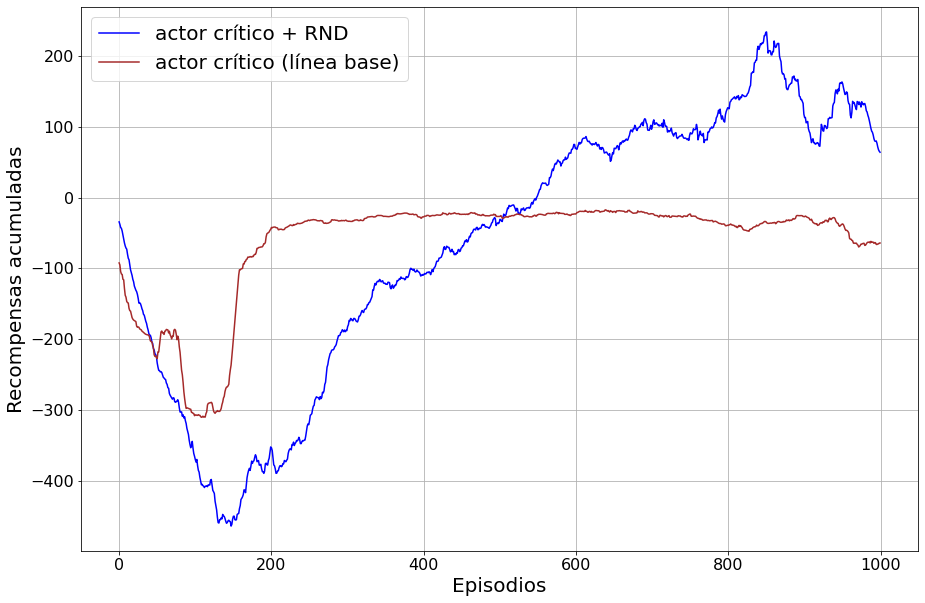

In [9]:
f,ax = plt.subplots(1, figsize = (15,10))
ax.plot((rf_rnd_mean), 'blue')
ax.plot((rf_ac_mean[:rf_rnd_mean.size]),'brown')
#ax.fill_between(range(rf_rnd_mean.size), rf_rnd_mean - 2*rf_rnd_std, rf_rnd_mean + 2*rf_rnd_std,
#                 color='blue', alpha=0.2)
#ax.fill_between(range(rf_rnd_mean.size), rf_ac_mean[:rf_rnd_mean.size] - 2*rf_ac_std[:rf_rnd_mean.size], rf_ac_mean[:rf_rnd_mean.size] + 2*rf_ac_std[:rf_rnd_mean.size],
#                 color='orange', alpha=0.2)
ax.set_ylabel('Recompensas acumuladas', fontsize=20)
ax.set_xlabel('Episodios', fontsize=20)
ax.set_title('')
ax.legend(['actor crítico + RND', 'actor crítico (línea base)'], fontsize = 20)
plt.grid(True)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

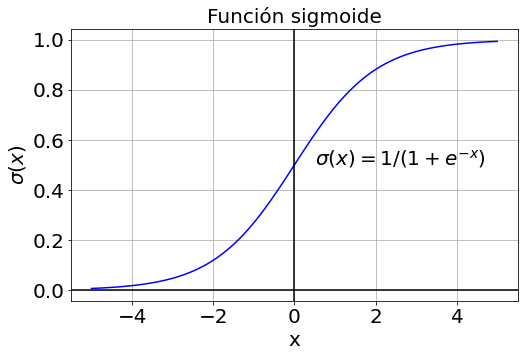

In [40]:
t = np.linspace(-5,5,100)
sigmoid = 1/(1+np.exp(-t))

fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(t, sigmoid, 'b')
#ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Función sigmoide', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('$\sigma(x)$', fontsize=20)
ax.text(0.5,0.5,'$\sigma(x) = 1/(1 + e^{-x}$)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

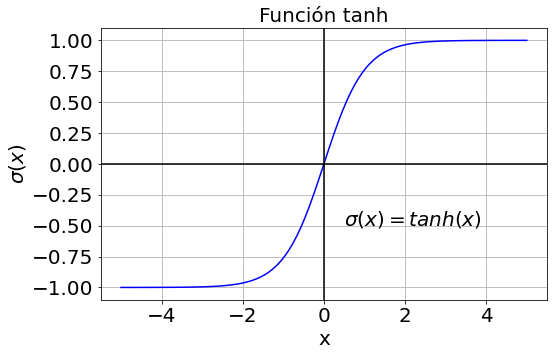

In [57]:
t = np.linspace(-5,5,100)
tanh = (np.exp(t)-np.exp(-t))/(np.exp(t)+np.exp(-t))

fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(t, tanh, 'b')
#ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Función tanh', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('$\sigma(x)$', fontsize=20)
ax.text(0.5,-0.5,'$\sigma(x) = tanh(x)$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

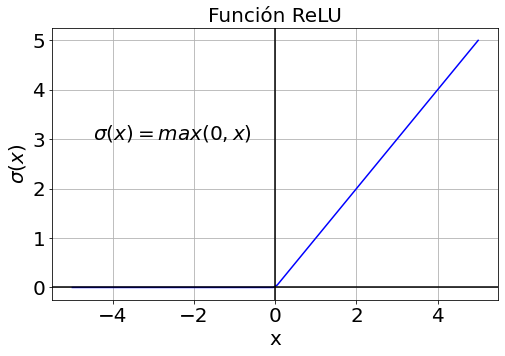

In [50]:
t = np.linspace(-5,5,100)
relu = np.maximum(0,t)

fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(t, relu, 'b')
#ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_title('Función ReLU', fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('$\sigma(x)$', fontsize=20)
ax.text(-4.5,3,'$\sigma(x) = max(0,x)$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
